<img src="../media/ccal-logo.jpg" width=450 height=237>
<table style="border:solid white;" cellspacing="0" cellpadding="0" border-collapse: collapse; border-spacing: 0;>
  <tr>
      <th style="background-color:white"> <img src="../media/moores-cancer-center-logo.png" width=175 height=200></th>
      <th style="background-color:white"> <img src="../media/gene-pattern-logo.png" width=175 height=200></th>
      <th style="background-color:white"> <img src="../media/ucsd-school-of-medicine-logo.png" width=175 height=200></th>
      <th style="background-color:white"> <img src="../media/broad-institute-logo.png" width=175 height=200></th>
  </tr>
</table>

<center><h1>Differential Expression<h1></center>
<h3>Authors:</h3><br>
Huwate (Kwat) Yeerna -  *Computational Cancer Analysis Laboratory (CCAL), UCSD Moores Cancer Center* <br>
Kate Medetgul-Ernar - *Computational Cancer Analysis Laboratory (CCAL), UCSD Moores Cancer Center*<br>
Clarence Mah - *Mesirov Lab, UCSD School of Medicine* <br>
Jill P. Mesirov - *Mesirov Lab, UCSD School of Medicine* <br>
Pablo Tamayo - *Computational Cancer Analysis Laboratory (CCAL), UCSD Moores Cancer Center* <br>

<h3>Article</h3><br>
The association metric is described in [*Kim, J.W., Botvinnik 2016*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4868596/). 

<h3>Analysis overview</h3><br>

In this notebook we identify the gene expression profiles that better match the profile of a given class distinction of interest. 

The matching or degree of association is determined using the Information Coefficient (IC) ([*Linfoot 1957*](http://www.sciencedirect.com/science/article/pii/S001999585790116X); [*Joe 1989*](https://www.jstor.org/stable/2289859?seq=1#page_scan_tab_contents); [*Kim, J.W., Botvinnik 2016*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4868596/)) a normalized version of the mutual information defined as,

$$IC(x, y) = sign(\rho(x,y)) \sqrt[]{ (1 - \exp(2I(x,y))} $$

where $I(x, y)$  is the differential mutual information between $x$, the phenotype, and $y$, the profile of each feature. This quantity  lies in the range [-1, 1], in analogy with the correlation coefficient. The sign of the correlation coefficient $\rho(x, y)$ is used to provide directionality. The differential [Mutual Information](https://en.wikipedia.org/wiki/Mutual_information) $I(x, y)$  is a function of the ratio of joint and marginal probabilities, 

$$I(x,y y) = \int \int P(x, y) \log \frac{P(x,y)}{P(x)P(y)} dx dy = H(x, y) - H(x) - H(y).$$

<img src="../media/MI.png" width=250 height=200> 


The $H(x,y)$, $H(x)$ and $H(y)$ are the joint and marginal [entropies](https://en.wikipedia.org/wiki/Entropy_(information_theory). Estimating the mutual information between a phenotype and gene expression profiles requires the empirical approximation of continuous probability density distributions using kernel [density estimators](https://en.wikipedia.org/wiki/Density_estimation) ([*Sheather 2004*](http://www.stat.washington.edu/courses/stat527/s13/readings/Sheather_StatSci_2004.pdf)).

###  Set up notebook

A Notebook Package uses a file called notebook_environment.py in the notebook directory to define the libraries and tools that need to be imported into every notebook. So all we need to do to prepare the notebook is import everything from notebook_environment.py.

__Run the cell below to ready the notebook. __

In [1]:
from notebook_environment import *
 
%matplotlib inline
%load_ext autoreload
%autoreload 2

Added '../tools/' to the path.


<hr style="border: none; border-bottom: 3px solid #88BBEE;">

### <center> Gene Expression: Comparing to a Binary Phenotype

<center>In the following template we'll use a matrix of 2000 genes by 10 samples (6 cancerous samples and 4 healthy samples). We'll find the genes that are most differentialy expressed between the healthy and cancerous samples. To replicate the example analysis below, run all the cells below. To use this template with your own data, follow the __bolded instructions__ beneath each numbered step.

### 1. Calculate the informational difference of feature enrichment between phenotypes

Here we calculate the informational difference of feature encrichment between phenotypes for each feature in the matrix.

__Set gene_expression equal to the name of your features by sample matrix file. Be sure that your features by sample matrix file is either in the data folder of the methods notebook project, or is linked there.__

In [5]:
gene_expression = pd.read_table('../data/kras_isogenic_vs_imortalized.gct', index_col='Name', skiprows=[0, 1]).drop('Description', 1)
gene_expression = gene_expression.iloc[0:2000]

__Set phenotype below to values that represent the two phenotypes you're comparing. For example, if the first 6 columns are one phenotype, and the last 4 columns are the second phenotype, you'll set phenotype to be the following__:

In [6]:
phenotypes = pd.Series(data=[1, 1, 1, 1, 1, 1, -1, -1, -1, -1])
phenotypes.index = gene_expression.columns

Target None (10,) and features (2000, 10) have 10 shared columns.
Dropping 306 axis-1 slices containing at most 1 unique object(s) ...
Matching ...
Using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	With 30 bootstrapped distributions ...
Computing p-value and FDR ...
	By scoring against 2 permuted targets ...
Making annotations ...
Plotting match panel ...


/Users/kateme/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


,Score,0.95 CI,p-value,FDR
Name,,,,
LEPRE1,0.859081,0.0240737,0.000295,0.027778
YBX1,0.854738,0.0723513,0.000295,0.027778
GPR3,0.853045,0.0664324,0.000295,0.027778
RP5-1160K1.6,0.851481,0.0370289,0.000295,0.027778
PLOD1,0.849378,0.0216418,0.000295,0.027778
RPL5,0.846574,0.0719014,0.000295,0.027778
ELTD1,0.845377,0.0361836,0.000295,0.027778
SSBP3,0.841912,0.0566669,0.000295,0.027778
EFHD2,0.841230,0.0331764,0.000295,0.027778


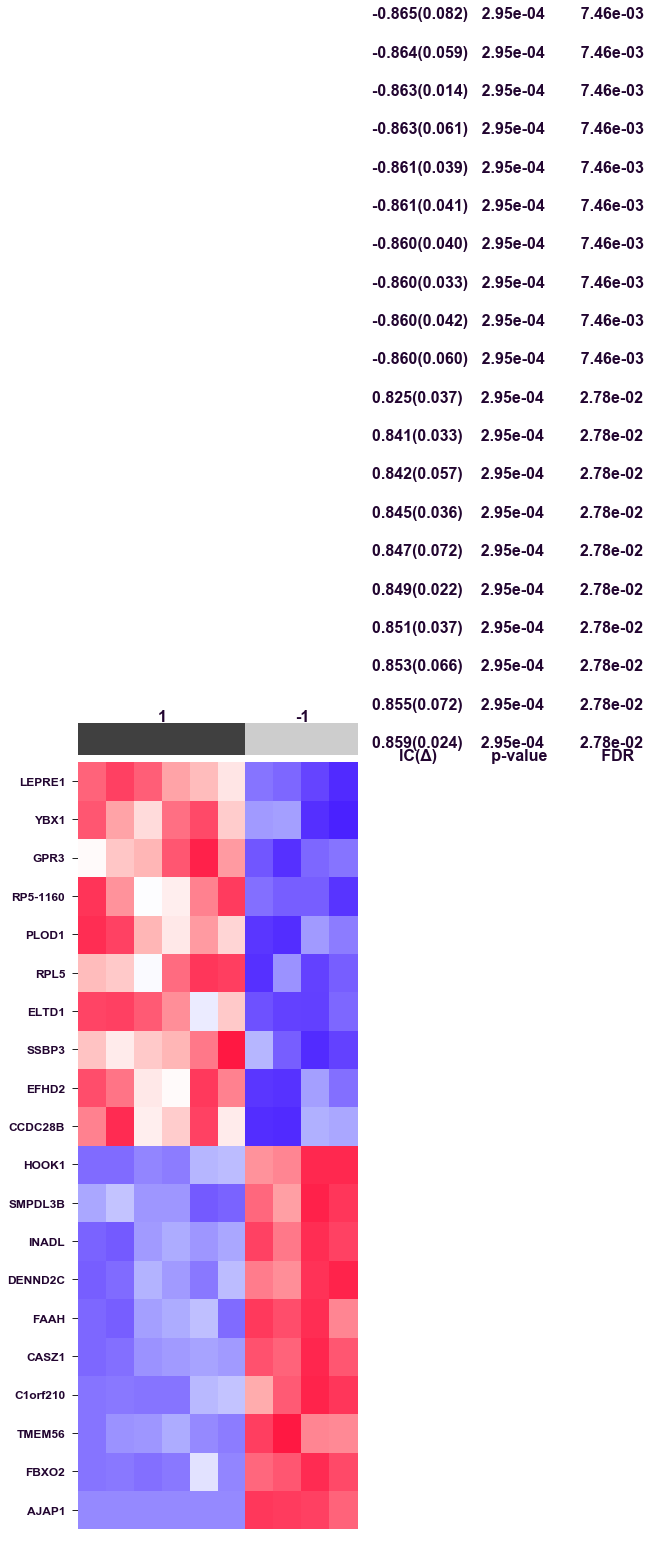

In [7]:
modalities.differential_gene_expression(phenotypes, 
                                        gene_expression,  
                                        number_of_permutations=2)